## Welcome to your notebook.


#### The cell below will set up the GIS module and establish your credentials, run it to get started:

In [4]:
from arcgis.gis import GIS
gis = GIS("home")

#### Now you are ready to start scripting!

In [11]:
import arcpy

import pandas, seaborn

import tensorflow

<Item title:"AirNowStationData" type:Feature Layer Collection owner:anieto>
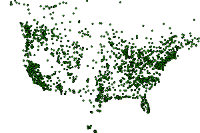

In [12]:
# Item Added From Toolbar
# Title: AirNowStationData | Type: Feature Service | Owner: anieto
layer = gis.content.get("ff014438b2a946ddb9be5fd6bf8dd104")
layer

<Item title:"USA States (Generalized)" type:Feature Layer Collection owner:esri_livingatlas>
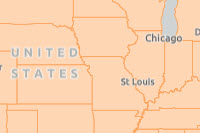

In [34]:
# Item Added From Toolbar
# Title: USA States (Generalized) | Type: Feature Service | Owner: esri_livingatlas
s = gis.content.get("99fd67933e754a1181cc755146be21ca")
s

In [15]:
m = gis.map('USA')
m.add_layer(layer)
m

MapView(layout=Layout(height='400px', width='100%'))

In [16]:
table = pandas.DataFrame.spatial.from_layer(layer.layers[0])
table.head()

,SHAPE,aqsid,co,co_unit,countrycode,datasource,elevation,eparegion,f__objectid,gmtoffset,...,pm25_measured,pm25_unit,reportingarea_pipedelimited,sitename,so2,so2_unit,statename,status,validdate,validtime
0,"{""x"": -9013138.420000002, ""y"": 4166042.1000000...",450918002,0.0,None,US,South Carolina DHEC,201.9,R4,1,-5.0,...,0,None,None,Fort Mill ANG,0.0,None,SC,Inactive,11/28/18,14:00
1,"{""x"": -13119213.499999996, ""y"": 4363839.690000...",060270030,0.0,None,US,Great Basin Unified Air Pollution Control Dist...,0.0,R9,2,-8.0,...,0,None,None,Mill Site,0.0,None,CA,Active,11/28/18,14:00
2,"{""x"": -8491818.11, ""y"": 4872730.920000002, ""sp...",420710007,0.0,None,US,Pennsylvania Dept. of Environmental Protection,0.0,R3,3,-5.0,...,1,UG/M3,Susquehanna Valley,Lancaster,0.0,None,PA,Active,11/28/18,14:00
3,"{""x"": -13174817.580000002, ""y"": 5789776.969999...",530710005,0.0,None,US,Washington Department of Ecology,266.9,R10,4,-8.0,...,1,UG/M3,Walla Walla,Walla Walla-12th St,0.0,None,WA,Active,11/28/18,14:00
4,"{""x"": -11234763.759999998, ""y"": 3423423.939999...",484655017,0.0,None,US,Texas Commission on Environmental Quality,298.9,R6,5,-6.0,...,0,None,None,Del Rio KDRT C5017,0.0,None,TX,Active,11/28/18,14:00


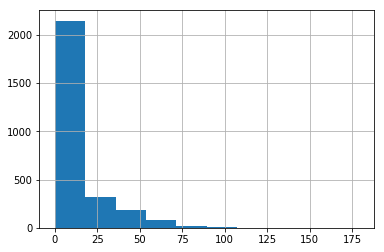

In [28]:
table.pm25_aqi.hist()

In [29]:
table.pm25_aqi.describe()

count    2764.000000
mean        9.832489
std        18.576830
min         0.000000
25%         0.000000
50%         0.000000
75%        14.000000
max       179.000000
Name: pm25_aqi, dtype: float64

In [27]:
table = table.loc[table.pm25_aqi > -999]

In [30]:
from IPython.display import IFrame
IFrame('https://airnow.gov/index.cfm?action=aqibasics.particle', width=1366, height=600)

In [39]:
from arcgis import features
inter =features.analyze_patterns.interpolate_points(layer, 'PM25_AQI', bounding_polygon_layer=s, output_name="pm_25_03")
inter

<Item title:"pm_25_03" type:Feature Layer Collection owner:anieto>

In [40]:
m.add_layer(inter)